In [94]:
# Libraries used for analysis 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Files upload 
rest = pd.read_csv("FOOD_CATEGORY_restaurants_output.csv")
menus = pd.read_csv("FOOD_CATEGORY_restaurant_menus_output.csv")

In [96]:
# Update r_price_range column: $ = Inexpensive, $$ = Moderately expensive, 
# $$$ = Expensive, $$$$ = Very Expensive.
price_map = {'$': 'Inexpensive', '$$': 'Moderately expensive', 
             '$$$': 'Expensive', '$$$$': 'Very expensive'}

rest['r_price_range'] = rest['r_price_range'].map(price_map)

In [99]:
# Change the name of cities in the state_city column
def format_city_name(state_city):
    state, city = state_city.split('/')
    formatted_city = ' '.join(word.capitalize() for word in city.split(' '))
    return f"{state}/{formatted_city}"

rest['state_city'] = rest['state_city'].apply(format_city_name)

In [101]:
print(rest.head())

   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  rm_restaurant_id  \
0            21            21          21                28   
1            28            28          28                43   
2            46            46          46                68   
3            80            80          80               106   
4            81            81          81               108   

                        r_onlyname      r_city r_state  r_score  r_ratings  \
0  Sunny  Fines Breakfast Burritos  birmingham      al      NaN        NaN   
1                        Taco Bell  birmingham      al      4.1       91.0   
2     Los Arcos Mexican Restaurant  birmingham      al      4.3      100.0   
3            Taqueria La Herradura  birmingham      al      NaN        NaN   
4               Cabo Coastal Grill  birmingham      al      NaN        NaN   

                                r_category         r_price_range      r_lat  \
0  mexican, breakfast and brunch, burritos           Inexpensive  33.5098

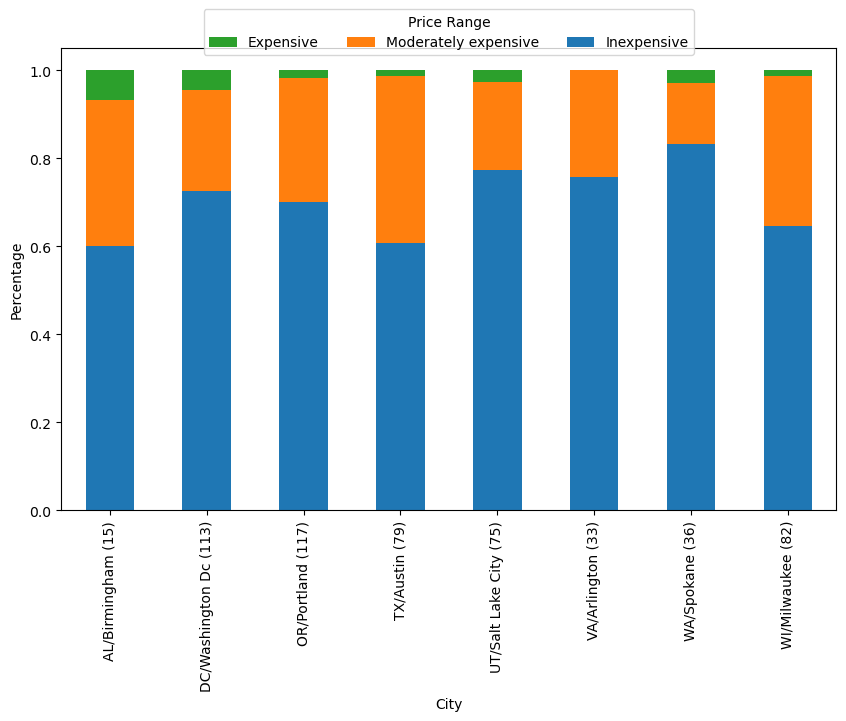

In [104]:
# Create a pivot table to get the count of restaurants in each price range for each city
pivot_table = rest.pivot_table(index='state_city', columns='r_price_range', values='rm_restaurant_id', aggfunc='count')

# Reorder the columns in the pivot table
pivot_table = pivot_table[['Inexpensive', 'Moderately expensive', 'Expensive']]

# Calculate the percentage of restaurants in each price range for each city
percent_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Get the count of restaurants for each city
city_count = rest.groupby('state_city').size().to_dict()

# Add the number of restaurants for each city in the brackets for each city name
percent_table.index = [format_city_name(city) + ' (' + str(city_count[city]) + ')' for city in percent_table.index]

# Create the stacked bar plot
ax = percent_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and axis labels
ax.set_xlabel('City')
ax.set_ylabel('Percentage')

# Set the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Price Range', loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.1))

# Show the plot
plt.show()


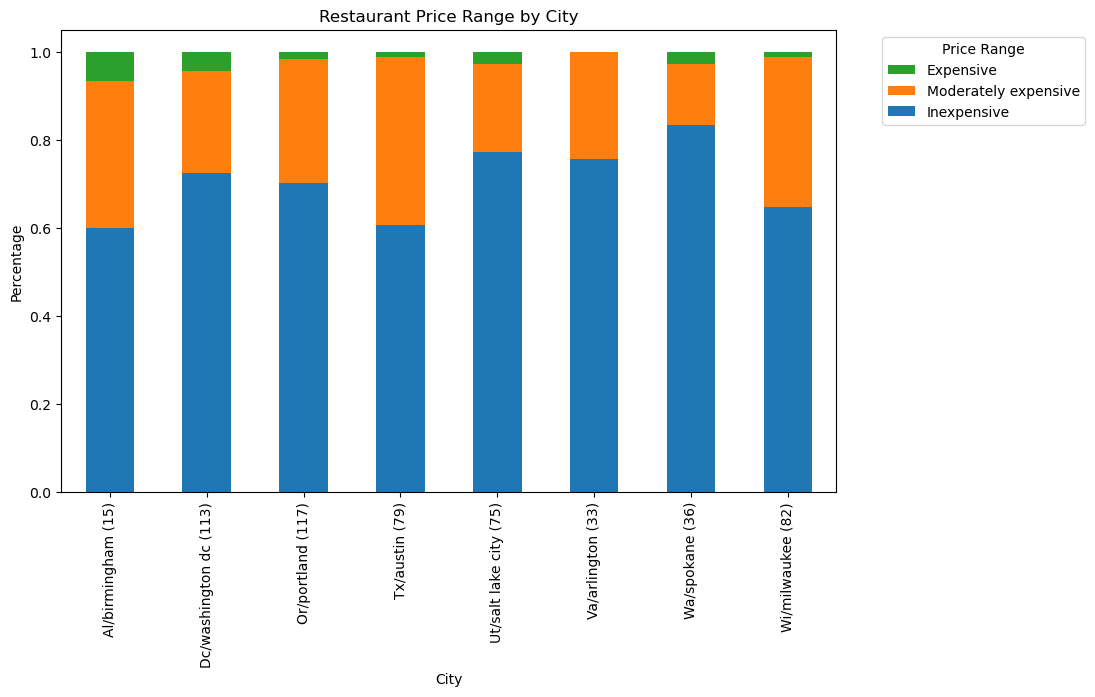

In [100]:
# Create a pivot table to get the count of restaurants in each price range for each city
pivot_table = rest.pivot_table(index='state_city', columns='r_price_range', values='rm_restaurant_id', aggfunc='count')

# Reorder the columns in the pivot table
pivot_table = pivot_table[['Inexpensive', 'Moderately expensive', 'Expensive']]

# Calculate the percentage of restaurants in each price range for each city
percent_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Get the count of restaurants for each city
city_count = rest.groupby('state_city').size().to_dict()

# Add the number of restaurants for each city in the brackets for each city name
percent_table.index = [city.capitalize() + ' (' + str(city_count[city]) + ')' for city in percent_table.index]

# Create the stacked bar plot
ax = percent_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and axis labels
ax.set_title('Restaurant Price Range by City')
ax.set_xlabel('City')
ax.set_ylabel('Percentage')

# Set the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [93]:
# count restaurants per each price range and percentages of all 
rest['r_price_range'].value_counts()

Series([], Name: r_price_range, dtype: int64)

In [56]:
# Create new data frame without expensive restaurants and export to csv file
cheap_rest = rest[(rest['r_price_range'] != 'Expensive') & (rest['r_price_range'] != '$$$$')]
cheap_rest.to_csv('cheap_restaurants_output.csv', index=False)

cheap_rest['r_price_range'].value_counts()

Inexpensive             387
Moderately expensive    150
Name: r_price_range, dtype: int64

In [58]:
print(cheap_rest.head())

   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  rm_restaurant_id  \
0            21            21          21                28   
1            28            28          28                43   
2            46            46          46                68   
3            80            80          80               106   
4            81            81          81               108   

                        r_onlyname      r_city r_state  r_score  r_ratings  \
0  Sunny  Fines Breakfast Burritos  birmingham      al      NaN        NaN   
1                        Taco Bell  birmingham      al      4.1       91.0   
2     Los Arcos Mexican Restaurant  birmingham      al      4.3      100.0   
3            Taqueria La Herradura  birmingham      al      NaN        NaN   
4               Cabo Coastal Grill  birmingham      al      NaN        NaN   

                                r_category         r_price_range      r_lat  \
0  mexican, breakfast and brunch, burritos           Inexpensive  33.5098

In [65]:
highest = cheap_rest["max"].max()
lowest = cheap_rest["max"].min()

print(lowest, highest)

3.0 286.0


In [66]:
top10 = cheap_rest['max'].nlargest(10)

print(top10)

311    286.00
58     140.00
287    130.00
259    126.50
338    120.00
264    111.92
156    110.00
266    100.00
362    100.00
294     99.00
Name: max, dtype: float64


In [72]:
# Remove the "USD" string and convert the 'price' column to a numeric data type
menus['price'] = menus['price'].str.replace(' USD', '').astype(float)

In [87]:
# Merge two data sets
merged_data = cheap_rest.merge(menus, left_on="rm_restaurant_id", right_on="restaurant_id")

merged_data.to_csv('cheap_restaurants_with_menus', index=False)

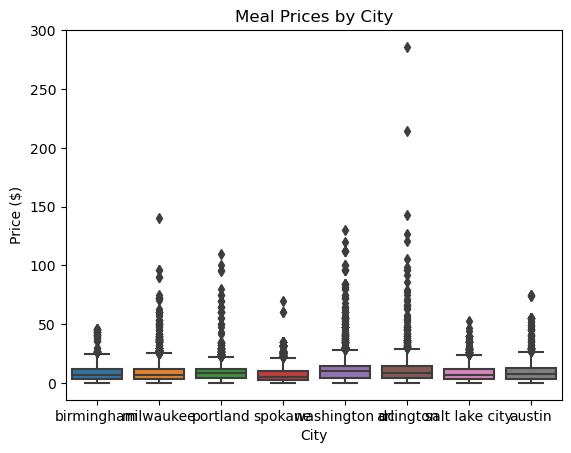

In [78]:
# Create a box plot of meal prices by city
sns.boxplot(x='state_city', y='price', data=merged_data)

# Set the title and axis labels
plt.title('Meal Prices by City')
plt.xlabel('City')
plt.ylabel('Price ($)')

# Show the plot
plt.show()


In [77]:
# check the most expensive meals in menus 
df_sorted = merged_data.sort_values(by='price', ascending=False)
top_30 = df_sorted.head(30)
print(f"The top 10 values in all columns: {top_30}")

The top 10 values in all columns:        Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0_x  rm_restaurant_id  \
19333          2991          7466          7466             20216   
19332          2991          7466          7466             20216   
19331          2991          7466          7466             20216   
3630            577           577           577              2377   
17693          2796          7204          7204             19891   
16148          2548          6877          6877             19461   
16153          2548          6877          6877             19461   
20532          3650          9700          9700             28505   
16658          2624          6976          6976             19586   
16652          2624          6976          6976             19586   
16655          2624          6976          6976             19586   
16646          2624          6976          6976             19586   
10085          1433          3446          3446             11724   


In [85]:
# Remove meals 60$ and higher 
merged_data2 = merged_data[merged_data['price'] < 30]

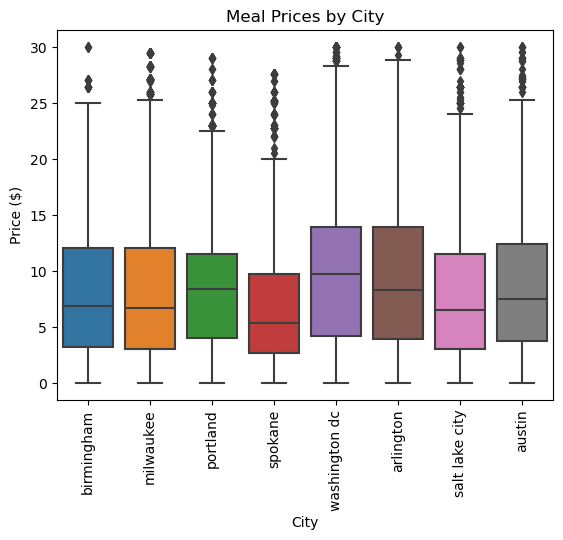

In [86]:
# Create a box plot of meal prices by city
sns.boxplot(x='state_city', y='price', data=merged_data2)

# Set the title and axis labels
plt.title('Meal Prices by City')
plt.xlabel('City')
plt.ylabel('Price ($)')

# Rotate the city names to be vertical on the x-axis
plt.xticks(rotation=90)

# Show the plot
plt.show()